# Estatística I | Projeto final

- 📅 Entrega até o dia 09 de abril, às 23:59:59, pelo LMS (seção projetos)
- ⚠️ Atenção: cada membro do grupo deve enviar uma cópia do trabalho no LMS.
- Formato de entrega: notebook python (ipynb)
- Crie uma conta no site kaggle.com, faça o download do dataset Body Fat Prediction, disponível gratuitamente [aqui](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset) e leia-o como um dataframe do pandas.

Vamos utilizá-lo para que você possa demonstrar os seus conhecimentos em estatística 🙂

## Alunos: Assuero Meira, Glaydson Gonçalo, Leandro Republicano, Leticia da Luz e Orestes Dos Santos


In [1]:
#Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


In [2]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Caminho do arquivo (Leticia)
caminho_csv = '/content/drive/MyDrive/Colab Notebooks/projeto_estatistica/bodyfat.csv'

In [4]:
# Caminho do arquivo (Assuero)
caminho_csv = '/content/drive/MyDrive/Projeto_estatística_DS_ADA/bodyfat.csv'

In [5]:
# Carregando o arquivo CSV usando Pandas
dataset_body_fat_pred = pd.read_csv(caminho_csv)

In [6]:
display(dataset_body_fat_pred)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


## Entendendo os dados.

In [7]:
dataset_body_fat_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
#Resumo estatístico
dataset_body_fat_pred.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


#### Avaliação

* Não foram identificadas linhas com valores nulos;
* As colunas são, em sua maioria do tipo float64, à exceção da coluna (Age), que é do tipo int64. Sendo assim, não será necessário, inicialmente, nenhum "casting" para trabalhar com os dados.

## Questão 1

Utilizando seus conhecimentos em Estatística Descritiva, forneça algumas análises sobre as colunas que julgar mais relevantes do dataset.

a) Para as colunas que você escolher, mostre-me as métricas de posição e de dispersão que julgar interessantes.

b) Faça um pré-julgamento a respeito das colunas deste dataset tentando encontrar um par de colunas que, pela lógica, deve ser altamente correlacionado e outro par de colunas que, pela lógica, deve ser fracamente correlacionado. Depois utilize as métricas de correlação que você aprendeu para pôr à prova essas suas opiniões, isto é, para descobrir se matemática confirma suas crenças
iniciais ou não.

c) Escolha pelo menos uma coluna e verifique graficamente se ela segue uma distribuição normal. Quais testes você poderia aplicar para confirmar se ela é mesmo normal ou não?

## Colunas que serão trabalhadas no item (a):
- Age;
- BodyFat;
- Abdomen.

#### Métricas de posição:
- Média;
- Moda;
- Mediana.

In [9]:
# Métricas de posição

# Média
mediaAge = dataset_body_fat_pred['Age'].mean()
mediaBodyFat = dataset_body_fat_pred['BodyFat'].mean()
mediaAbdomen = dataset_body_fat_pred['Abdomen'].mean()

# Mediana
medianaAge = dataset_body_fat_pred['Age'].median()
medianaBodyFat = dataset_body_fat_pred['BodyFat'].median()
medianaAbdomen = dataset_body_fat_pred['Abdomen'].median()

# Moda
modaAge = dataset_body_fat_pred['Age'].mode()
modaBodyFat = dataset_body_fat_pred['BodyFat'].mode()
modaAbdomen = dataset_body_fat_pred['Abdomen'].mode()

print(f"Para coluna [Age]: \n(a) Média igual a {mediaAge:.2f}; \n(b) Mediana igual a {medianaAge}; e \n(c) Moda igual a \n{modaAge}.")
print(f"Para coluna [BodyFat]: \n(a) Média igual a {mediaBodyFat:.2f}; \n(b) Mediana igual a {medianaBodyFat}; e \n(c) Moda igual a \n{modaBodyFat}.")
print(f"Para coluna [Abdomen]: \n(a) Média igual a {mediaAbdomen:.2f}; \n(b) Mediana igual a {medianaAbdomen}; e \n(c) Moda igual a \n{modaAbdomen}.")

Para coluna [Age]: 
(a) Média igual a 44.88; 
(b) Mediana igual a 43.0; e 
(c) Moda igual a 
0    40
Name: Age, dtype: int64.
Para coluna [BodyFat]: 
(a) Média igual a 19.15; 
(b) Mediana igual a 19.2; e 
(c) Moda igual a 
0    20.4
Name: BodyFat, dtype: float64.
Para coluna [Abdomen]: 
(a) Média igual a 92.56; 
(b) Mediana igual a 90.95; e 
(c) Moda igual a 
0     88.7
1     89.7
2    100.5
Name: Abdomen, dtype: float64.


#### Avaliando os resultados:
- Para coluna Age:
  - A média e a mediana estão bem próximas, contudo a moda, que para esta coluna é unimodal, revela uma maior frequência de idades em torno dos 40 anos. Ou seja, alguns poucos indivíduos deste grupo devem estar puxando a média um pouco para cima;
- Para coluna BodyFat:
  - A distribuição dos dados está mais uniforme, sugerindo pouco dispersão, considerando que a média, a moda e a mediana estão ocupando, praticamente, o mesmo ponto;
- Para coluna Abdomen:
  - Há uma maior dispersão dos dados, quando observada a moda, que neste caso, é multimodal, ou seja, há subgrupos de indivíduos que se agupam em torno de determinados valores de circunferência abdominal.

## Item (b), pré-julgamento de possíveis correlações:
- O aumento dos níveis de gordura corporal, relaciona-se positivamente com a idade, ou seja, quanto maior a idade, maior o nível de gordura corporal;
- A medida do abdomen e a do tornozelo não tem correlação, ou possuem fraca corelação.

#### Para testar estes pré-julgamentos, será usada a correlação de Pearson, que possui as seguintes características:
1. Valor: Varia de -1 a 1, onde -1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui), 0 indica nenhuma correlação linear, e 1 indica uma correlação positiva perfeita (ambas as variáveis aumentam ou diminuem juntas).
2. Aplicação: Mais adequada para dados que têm uma relação linear e são numericamente contínuos.
3. Requisitos: Ambas as variáveis devem ser aproximadamente normalmente distribuídas e sem outliers significativos que possam distorcer a relação.

#### Dados os requisitos, deve-se verificar a distribuição dos valores das colunas escolhidas e os outliers.

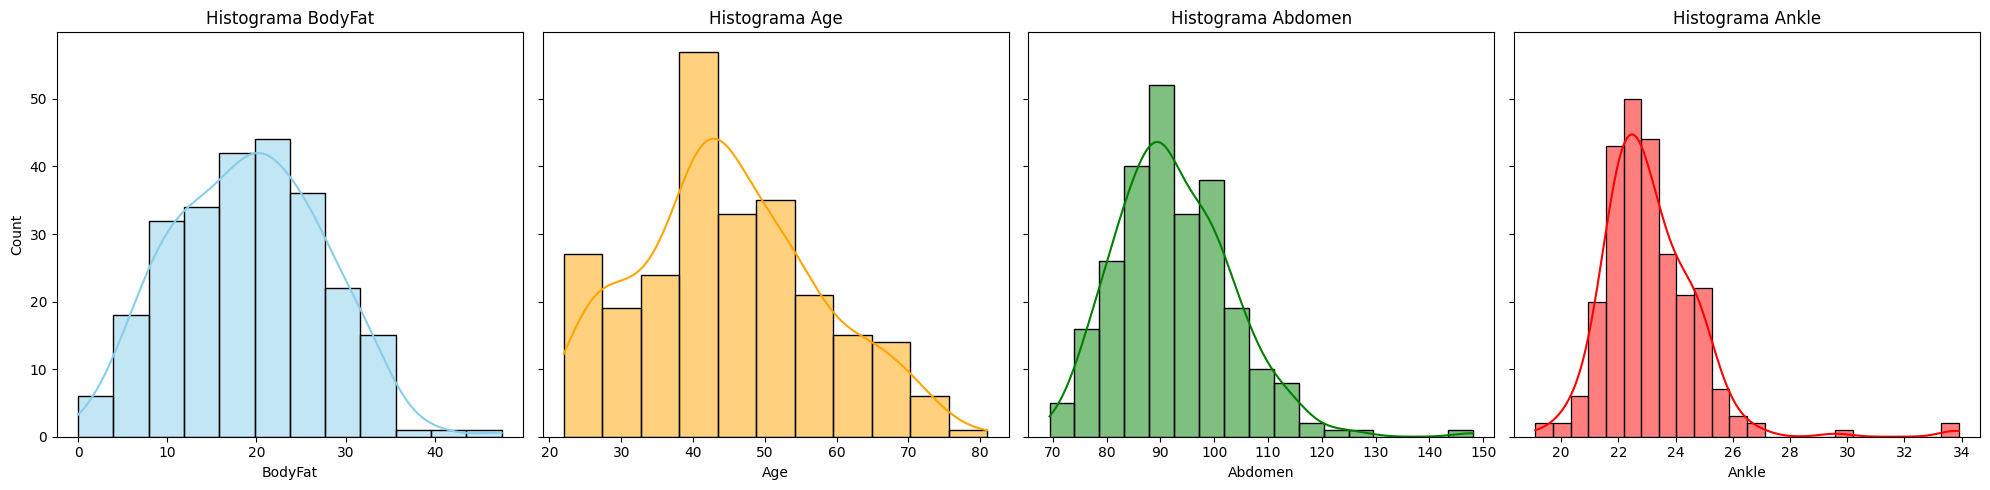

In [10]:
# Verificando a distribuição dos dados nas colunas.

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey = True)

sns.histplot(dataset_body_fat_pred['BodyFat'], ax = axes[0], color='skyblue', kde = True)
axes[0].set_title('Histograma BodyFat')

sns.histplot(dataset_body_fat_pred['Age'], ax = axes[1], color='orange', kde = True)
axes[1].set_title('Histograma Age')

sns.histplot(dataset_body_fat_pred['Abdomen'], ax = axes[2], color='green', kde = True)
axes[2].set_title('Histograma Abdomen')

sns.histplot(dataset_body_fat_pred['Ankle'], ax = axes[3], color='red', kde = True)
axes[3].set_title('Histograma Ankle')

plt.tight_layout()  # Ajusta automaticamente os subplots para que caibam no layout da figura
plt.show()

In [11]:
colunas = ['BodyFat', 'Age', 'Abdomen', 'Ankle']

from scipy.stats import shapiro

for coluna in colunas:
  stat, p = shapiro(dataset_body_fat_pred[coluna])
  print(f'Estatística de teste para coluna {coluna}: {stat:.2f}, p-valor: {p:.2f}')

  if p > 0.05:
    print(f'A distribuição da coluna {coluna} é, provavelmente, normal.\n')
  else:
    print(f'A distribuição da coluna {coluna}, provavelmente, não é normal.\n')

Estatística de teste para coluna BodyFat: 0.99, p-valor: 0.16
A distribuição da coluna BodyFat é, provavelmente, normal.

Estatística de teste para coluna Age: 0.98, p-valor: 0.00
A distribuição da coluna Age, provavelmente, não é normal.

Estatística de teste para coluna Abdomen: 0.97, p-valor: 0.00
A distribuição da coluna Abdomen, provavelmente, não é normal.

Estatística de teste para coluna Ankle: 0.85, p-valor: 0.00
A distribuição da coluna Ankle, provavelmente, não é normal.



#### Avaliação

- A observação dos histogramas, mostra um padrão de curva normal, apenas para coluna BodyFat, cumprindo com o primeiro requisito e ao mesmo tempo, parece ter outliers pouco significativos,  cumprindo com o segundo requisito para aplicar a correlação de Pearson.
- Para as outras colunas, será usado o método Yeo-Johnson para transformar em uma curva normal.

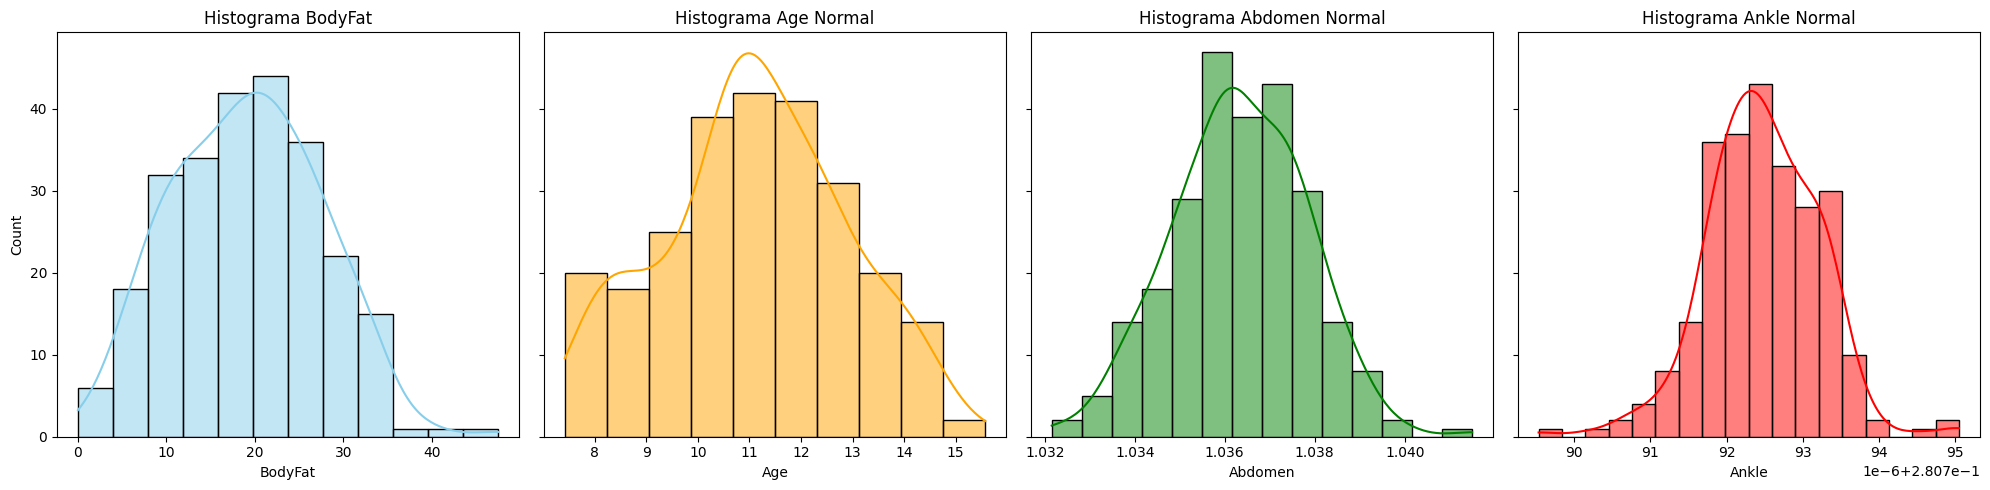

In [12]:
# Transformação das distribuições das curvas geradas pelas colunas Age, Abdomen e Ankle para uma curva normal
from scipy.stats import yeojohnson

# Definindo uma cópia do dataset
df_transformado = dataset_body_fat_pred.copy()

colunasParaTransformar = ['Age', 'Abdomen', 'Ankle']

for coluna in colunasParaTransformar:
  df_transformado[coluna], _ = yeojohnson(df_transformado[coluna])

# Histogramas para colunas transformadas:

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5), sharey = True)

sns.histplot(dataset_body_fat_pred['BodyFat'], ax = axes[0], color='skyblue', kde = True)
axes[0].set_title('Histograma BodyFat')

sns.histplot(df_transformado['Age'], ax = axes[1], color='orange', kde = True)
axes[1].set_title('Histograma Age Normal')

sns.histplot(df_transformado['Abdomen'], ax = axes[2], color='green', kde = True)
axes[2].set_title('Histograma Abdomen Normal')

sns.histplot(df_transformado['Ankle'], ax = axes[3], color='red', kde = True)
axes[3].set_title('Histograma Ankle Normal')

plt.tight_layout()  # Ajusta automaticamente os subplots para que caibam no layout da figura
plt.show()


#### Aplicando Shapiro-Wilk para verificar se os dados foram normalizados.

In [13]:
colunas = ['Age', 'Abdomen', 'Ankle']

from scipy.stats import shapiro

for coluna in colunas:
  stat, p = shapiro(df_transformado[coluna])
  print(f'Estatística de teste para coluna {coluna}: {stat:.2f}, p-valor: {p:.2f}')

  if p > 0.05:
    print(f'A distribuição da coluna {coluna} é, provavelmente, normal.\n')
  else:
    print(f'A distribuição da coluna {coluna}, provavelmente, não é normal.\n')

Estatística de teste para coluna Age: 0.98, p-valor: 0.01
A distribuição da coluna Age, provavelmente, não é normal.

Estatística de teste para coluna Abdomen: 1.00, p-valor: 0.92
A distribuição da coluna Abdomen é, provavelmente, normal.

Estatística de teste para coluna Ankle: 0.98, p-valor: 0.00
A distribuição da coluna Ankle, provavelmente, não é normal.



#### Aplicando a correlação de Spearman e testando os argumentos anteriores.

In [14]:
# Correlações as colunas.

correlacao1 = dataset_body_fat_pred['BodyFat'].corr(dataset_body_fat_pred['Age'], method='spearman')
correlacao2 = dataset_body_fat_pred['Abdomen'].corr(dataset_body_fat_pred['Ankle'], method='spearman')

print(f'A correlação entre gordura corporal e idade é: {correlacao1:.2f}')
print(f'A correlação entre circunferência abdominal e tornozelo é: {correlacao2:.2f}')

A correlação entre gordura corporal e idade é: 0.27
A correlação entre circunferência abdominal e tornozelo é: 0.51


#### Avaliação
- Os dados em duas colunas continuam sem seguir a distribuição normal. Neste caso, opta-se por usar a correlação de Spearman para correlacionar os dados entre as colunas.

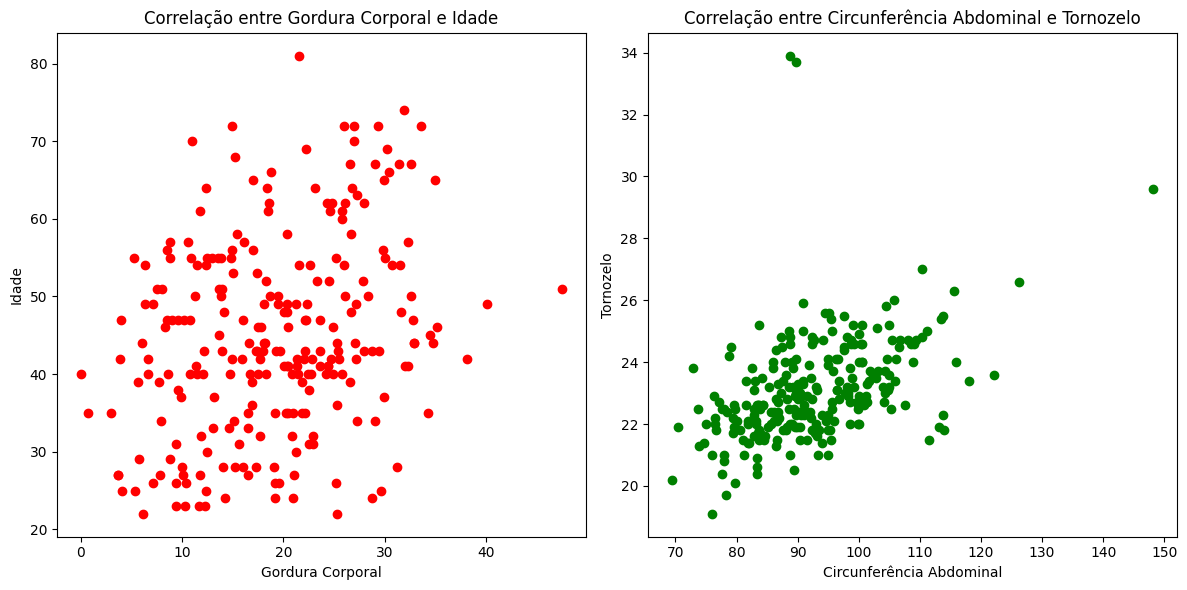

In [15]:
# Analisando o gráfico

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].scatter(dataset_body_fat_pred['BodyFat'], dataset_body_fat_pred['Age'], c = 'red')
axs[0].set_title('Correlação entre Gordura Corporal e Idade')
axs[0].set_xlabel('Gordura Corporal')
axs[0].set_ylabel('Idade')

axs[1].scatter(dataset_body_fat_pred['Abdomen'], dataset_body_fat_pred['Ankle'], c = 'green')
axs[1].set_title('Correlação entre Circunferência Abdominal e Tornozelo')
axs[1].set_xlabel('Circunferência Abdominal')
axs[1].set_ylabel('Tornozelo')

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()

#### Avaliação
- O aumento dos níveis de gordura corporal, relaciona-se positivamente com a idade, ou seja, quanto maior a idade, maior o nível de gordura corporal;
 - Porém, os resultados obtidos mostram uma correlação fraca entre estas duas variáveis, aproximando-se de 0. Ou seja, é possível que, apenas, o aumento da idade não seja determinante para o aumento da gordura corporal.
- A medida do abdomen e a do tornozelo possui uma correlação mais forte, aproximando-se mais de 1.
 - Sendo assim, observa-se uma tendência positiva no aumento da circunferência abdominal e aumento da medida do tornezelo.

 Os dois pré-julgamentos não foram confirmados, a partir da avaliação dos dados.

## Item (c)
- Será verificado, graficamente, se a coluna (Height) segue uma distribuição normal, através do Q-Q Plot (quantile-quantile plot).
- Em seguida, será usado o método Shapiro-Wilk para validar se a distribuição segue, ou não, um padrão normal.

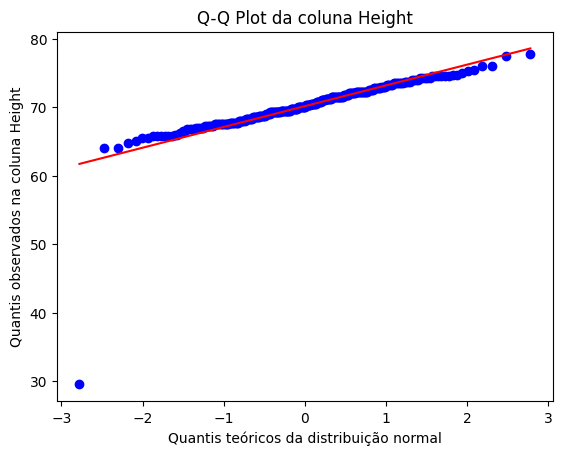

In [16]:
# Usando o Q-Q Plot para avaliar graficamente a distribuição da amostra.

height = dataset_body_fat_pred['Height']

stats.probplot(height, dist = 'norm', plot = plt)

plt.title('Q-Q Plot da coluna Height')
plt.xlabel('Quantis teóricos da distribuição normal')
plt.ylabel('Quantis observados na coluna Height')

plt.show()


In [17]:
# Analisando os dados pelo método de Shapiro-Wilk

from scipy.stats import shapiro

stat, p = shapiro(dataset_body_fat_pred['Height'])
print(f'Estatística de teste para coluna Height: {stat:.2f}, p-valor: {p:.4f}')

if p > 0.05:
  print(f'A distribuição da coluna Height é, provavelmente, normal.\n')
else:
  print(f'A distribuição da coluna Height, provavelmente, não é normal.\n')

Estatística de teste para coluna Height: 0.69, p-valor: 0.0000
A distribuição da coluna Height, provavelmente, não é normal.



#### Avaliação
- Ao avaliar os dados gráficos percebe-se uma um comportamento semelhante a uma distribuição normal, contudo, observa-se um outlier.
- Quando se avalia o resultado do teste de Shapiro-Wilk, que demonstra dados fora de uma distribuição normal, estima-se que o outlier esteja interferindo no cálculo.
- Para avaliar a infuência do oulier, os dados serão filtradosm retirando-se o outlier e repetindo-se o teste de Shapiro-Wilk.

In [18]:
# Calcular o intervalo interquartil (IQR)

q1 = dataset_body_fat_pred['Height'].quantile(0.25)
q3 = dataset_body_fat_pred['Height'].quantile(0.75)
iqr = q3 - q1

# Definindo os limites para identificar os outliers

limiteInferior = q1 - 1.5 * iqr
limiteSuperior = q3 + 1.5 * iqr

# Filtrando os dados, para retirar os outliers

filtro = dataset_body_fat_pred[(dataset_body_fat_pred['Height'] >= limiteInferior) & (dataset_body_fat_pred['Height'] <= limiteSuperior)]

# Novo teste nos dados filtrados

stat, p = shapiro(filtro['Height'])
print(f'Estatística de teste para coluna Height: {stat:.2f}, p-valor: {p:.4f}')

if p > 0.05:
  print(f'A distribuição da coluna Height é, provavelmente, normal.\n')
else:
  print(f'A distribuição da coluna Height, provavelmente, não é normal.\n')



Estatística de teste para coluna Height: 0.99, p-valor: 0.2331
A distribuição da coluna Height é, provavelmente, normal.



#### Avaliação
- Após filtrar os dados, retirando-se o outlier, percebe-se sua interferência no teste relaizado. Sendo assim, sem a presença de outliers, os dados seguem a distribuição normal.

## Questão 2
Considerando o mesmo dataset e tomando-o como espaço amostral, responda (fique à vontade para usar o Python para facilitar a sua vida aqui):

a) Qual é a probabilidade de uma pessoa selecionada ao acaso ter uma idade (coluna Age) superior a 40 anos?

b) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20%?

c) Escolha pelo menos uma coluna e verifique graficacemente se ela segue uma distribuição normal. Quais testes você poderia aplicar para confirmar se ela é mesmo normal ou não?

d) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20% se eu já souber de antemão que esta pessoa tem uma idade superior a 40 anos?

Para responder a alternativa (a) será usada uma abordagem estatística simples para calcular a proporção de observações que satisfazem a condição em relação ao total de observações.

In [19]:
# Calcular o número de vezes que uma pessoa com mais de 40 anos aparece.

maior40 = dataset_body_fat_pred[dataset_body_fat_pred['Age'] > 40].shape[0]

# Calculando o total de observações na coluna 'Age'

total = len(dataset_body_fat_pred)

# Proporção de pessoas com mais de 40 anos

proporcao = maior40 / total

# Calculando a probabilidade

probabilidade = proporcao * 100

print(f"A probabilidade de uma pessoa selecionada ao acaso ter mais de 40 anos é de {probabilidade:.2f}%.")

A probabilidade de uma pessoa selecionada ao acaso ter mais de 40 anos é de 63.49%.


Para o item (b), será o usado o mesmo raciocínio do item (a).


In [20]:
# Calcular o número observações de pessoas com mais de 20% de gordura corporal
gorduraCorporalMaior20 = dataset_body_fat_pred[dataset_body_fat_pred['BodyFat'] > 20].shape[0]

# Calculando o total de observações na coluna 'BodyFat'

total = len(dataset_body_fat_pred)

# Proporção de pessoas com mais de 20% de gordura corporal

proporcao = gorduraCorporalMaior20 / total

# Calculando a probabilidade

probabilidade = proporcao * 100

print(f"A probabilidade de uma pessoa selecionada ao acaso ter mais de 20% de gordura corpotal é de {probabilidade:.2f}%.")

A probabilidade de uma pessoa selecionada ao acaso ter mais de 20% de gordura corpotal é de 47.62%.


- Para o item (c), os testes serão realizados na coluna 'Biceps'.
 - Para a análise gráfica, será usado o Gráfico de Quantis (Q-Q Plot), já utilizado e explicado na questão anterior;
 - Quanto aos testes, será usado Shapiro-Wilk.

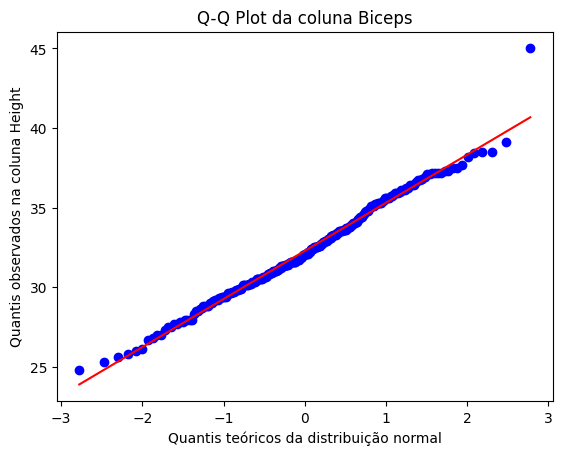

In [21]:
# Analisando a distribuição dos dados da coluna Biceps, por meio do Q-Q Plot

biceps = dataset_body_fat_pred['Biceps']

stats.probplot(biceps, dist = 'norm', plot = plt)

plt.title('Q-Q Plot da coluna Biceps')
plt.xlabel('Quantis teóricos da distribuição normal')
plt.ylabel('Quantis observados na coluna Height')

plt.show()

In [22]:
# Analisando os dados pelo método de Shapiro-Wilk

from scipy.stats import shapiro

stat, p = shapiro(dataset_body_fat_pred['Biceps'])
print(f'Estatística de teste para coluna Biceps: {stat:.2f}, p-valor: {p:.4f}')

if p > 0.05:
  print(f'A distribuição da coluna Biceps é, provavelmente, normal.\n')
else:
  print(f'A distribuição da coluna Biceps, provavelmente, não é normal.\n')

Estatística de teste para coluna Biceps: 0.99, p-valor: 0.0464
A distribuição da coluna Biceps, provavelmente, não é normal.



#### Avaliação
- Vale observar que no gráfico Q-Q Plot há um outlier que deve estar interferindo na distribuição normal dos dados.

Para o item (d) será usada a probabilidade condicional, pois será calculada a probabilidade de selecioanar uma pessoa com mais de 20% de gordura corporal, dado que está pessoa tem mais de 40 anos.

P(A∣B)= P(A∩B) / P(B)

In [23]:
# A quantidade de pessoas com mais de 40 anos já foi encontrada --> maior40

maior40 = dataset_body_fat_pred[dataset_body_fat_pred['Age'] > 40]

# Encontrar a quantidade de pessoas com mais de 40 anos e com percentual de gordura corporal maior do que 20%

qtdePessoasMaior40Mais20 = maior40[maior40['BodyFat'] > 20].shape[0]

# Calcular a probabilidade condicional

p_ab = (qtdePessoasMaior40Mais20 / maior40.shape[0]) * 100

print(f"A probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal superior a 20%, dado que esta pessoa tem mais de 40 anos, é de {p_ab:.2f}%.")

A probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal superior a 20%, dado que esta pessoa tem mais de 40 anos, é de 55.00%.


### Questão 3
Durante o módulo, nós definimos algumas distribuições de probabilidade, cada uma com uma função de probabilidade.

a) Escolha uma delas que não seja uma distribuição normal, e explique (talvez com algum exemplo) que tipos de evento esta distribuição descreve.

b) Explique a utilidade prática das funções de probabilidade. Quero dizer: para quê elas servem? De que modo elas nos ajudam?

c) Escolha uma das colunas do nosso dataset que sejam contínuas e que sigam uma distribuição normal, e calcule a probabilidade de uma pessoa escolhida ao acaso ter um valor > x para esta coluna (por exemplo, probabilidade de neck ser maior que 45). Mas, atenção: faça isso usando z-scores, através da função st.norm.cdf, do pacote Python scipy.stats.

**a) Escolha uma delas que não seja uma distribuição normal, e explique (talvez com algum exemplo) que tipos de evento esta distribuição descreve.**

**Distribuição binomial** ela pode ser definida como uma distribuição de probabilidade específica utilizada para modelar a probabilidade de obter um de dois resultados (SUCESSO OU FRACASSO), um certo número de vezes (k), a partir de um número fixo de tentativas (N) de um evento aleatório discreto.

A função de probabilidade da distribuição binomial é dada por:

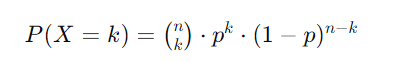

-  p(X=k)é a probabilidade de obter exatamente k sucessos em n tentativas;
- (n/k​)é o coeficiente binomial, que representa o número de maneiras de escolher k sucessos em n tentativas e é calculado como:

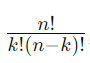
  - p é a probabilidade de sucesso em uma tentativa individual;
  - (1−p)é a probabilidade de fracasso em uma tentativa individual.

  ### Podemos usar a distribuição para resolver, por exemplo, a seguinte questão:
  - Imagine um evento aleatório dado pelo lançamento de uma moeda honeste e homogênea. Se esta for lançada 4 vezes, qual é a probabilidade de sair pelo menos 3 caras?
  
  -Probabilidade de obter Exatamente 3 Caras:  
  P(x=3) = (4/3)* 0.5³*(1-0.5)^4-3   
  P(x=3) = (4/3) * 0.125 * 0.5¹   
  P(x=3) = (4/3) * 0.125 * 0.5   
  P(x=3) = (4/3) * 0.0625  
    - (4/3) -> 4!/(3!(4-3)! -> 4  

  P(x=3) = 4 * 0.0625 = 0.25  

  - Probabilidade de obter Exatamente 4 Caras:  
   P(x=3) = (4/4)* 0.5^4*  (1-0.5)^4-4   
   P(x=3) = (4/4) * 0.0625  * 0.5^0   
   P(x=3) = (4/4) *  0.0625  
    - (4/4) -> 4!/(4!(4-3)! -> 1  
  
  P(x=4) = 1* 0.0625=   0.0625

  Somando as probabilidades: =0.25+0.0625=0.3125, ou 31,25%

- **Como a distribuição binomial é usada para modelar o número de sucessos em uma série de ensaios independentes de Bernoulli (onde cada ensaio tem apenas dois possíveis resultados: sucesso ou fracasso). Aplicá-la diretamente em nosso dataset não é imediatamente intuitivo, uma vez que as variáveis são contínuas e a distribuição binomial trata de eventos discretos.**

- **No entanto, podemos adaptar o conceito para criar uma aplicação envolvendo o peso das pessoas, transformando-o em um problema binomial através de categorização.**

- Definindo o Problema:  Vamos calcular a probabilidade de uma pessoa selecionada aleatoriamente ter peso maior que 200.
  - Então vamos calcular a probabilidade de encontrar exatamente k pessoas com peso maior que 200 em um subconjunto aleatório de n pessoas do dataset original.

In [24]:
#Copiando o Dataset original em um novo dataset para realizar as alterações
dataset_Weight = dataset_body_fat_pred
dataset_Weight.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [25]:
#Criando um nova coluna para classificar a pessoas com peso maior que 200
dataset_Weight['peso_200'] = (dataset_Weight['Weight']>200).astype(int)
dataset_Weight.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,peso_200
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,0
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0


In [26]:
#Calculando a Probabilidade de 'Sucesso'
p_maior_que_200kg = dataset_Weight['peso_200'].mean()
p_maior_que_200kg

0.2222222222222222

A linha acima calcula a média da coluna 'peso_200'. Como essa coluna contém apenas 0 e 1, onde 1 representa um 'sucesso' (peso maior que 200 kg), a média aqui efetivamente calcula a proporção de 'sucessos' no dataset. Isso é igual à probabilidade p de uma pessoa selecionada aleatoriamente ter um peso maior que 200 kg.

In [27]:
#Definindo os Parâmetros para a Distribuição Binomial
n = 20 #número total de pessoas selecionadas aleatoriamente para nossa amostra
k = 5 #número específico de pessoas que queremos calcular a probabilidade de terem um peso maior que 200 kg.

In [28]:
from scipy.stats import binom
#Calculando a Probabilidade com a Distribuição Binomial
probabilidade = binom.pmf(k, n, p_maior_que_200kg)
probabilidade

0.1937377043921154

## Então, a probabilidade de selecionar aleatoriamente 20 pessoas e exatamente 5 delas terem peso maior que 200 kg é aproximadamente 19.37%.

**b) Explique a utilidade prática das funções de probabilidade. Quero dizer: para quê elas servem? De que modo elas nos ajudam?.**

As funções de probabilidade são ferramentas essenciais na teoria das probabilidades e em estatística. Elas nos ajudam a modelar e compreender incertezas e variabilidade em eventos e processos.

- As funções de probabilidade permitem que descrevamos a incerteza associada a eventos: Exemplo: Ao prever o tempo, os meteorologistas usam funções de probabilidade para descrever a incerteza nas previsões climáticas.  Geocientistas usam modelos probabilísticos para estimar a probabilidade de ocorrência de terremotos em determinadas regiões dentro de um intervalo de tempo especificado.


- As funções de probabilidade nos permitem calcular a probabilidade de eventos específicos: As companhias de seguros utilizam funções de probabilidade para avaliar o risco de eventos específicos, como acidentes de carro ou desastres naturais. A probabilidade de um segurado fazer um sinistro é usada para determinar o prêmio do seguro. Por exemplo, se a probabilidade de um acidente de carro em uma determinada área é alta, o custo do seguro para motoristas nessa área será maior.

- Inferência Estatística: Através da inferência estatística, podemos fazer afirmações sobre uma população com base em amostras: Os epidemiologistas usam funções de probabilidade para fazer inferências sobre a transmissão de doenças na população. A partir de dados de amostras, eles podem calcular a probabilidade de uma pessoa ser infectada sob certas condições, ajudando a modelar a propagação de doenças e a eficácia das intervenções de saúde pública.


- Modelagem de Processos Aleatórios:Em operações de serviço, como bancos ou aeroportos, as funções de probabilidade são usadas para modelar o comportamento das filas de espera. Por exemplo, a distribuição de Poisson pode modelar o número de clientes que chegam por hora, enquanto a distribuição exponencial pode representar o tempo de serviço. Esses modelos ajudam a melhorar a eficiência operacional e a satisfação do cliente.

- Machine Learning e Aprendizado Estatístico: Algoritmos de aprendizado de máquina usam funções de probabilidade para estimar parâmetros, fazer previsões e classificar dados. Exemplo: Algoritmos de aprendizado de máquina aplicam funções de probabilidade para identificar transações fraudulentas. Eles podem, por exemplo, calcular a probabilidade de uma transação ser fraudulenta com base em características como valor da transação, localização e histórico do usuário.
  

**c) Escolha uma das colunas do nosso dataset que sejam contínuas e que sigam uma distribuição normal, e calcule a probabilidade de uma pessoa escolhida ao acaso ter um valor > x para esta coluna (por exemplo, probabilidade de neck ser maior que 45). Mas, atenção: faça isso usando z-scores, através da função st.norm.cdf, do pacote Python scipy.stats.**

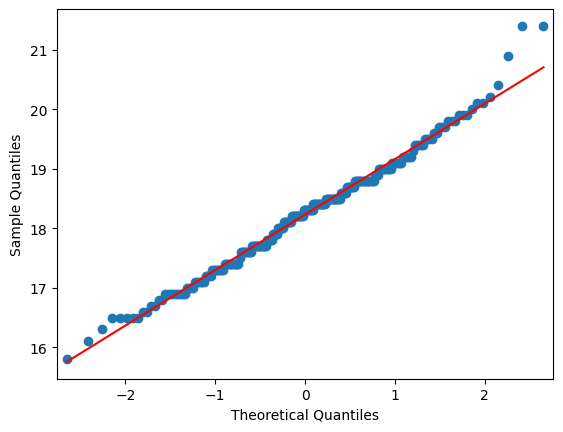

In [29]:
#Verificando a suposição de normalidade da coluna 'Wrist' com qqplot:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Criando QQ plot
sm.qqplot(dataset_body_fat_pred['Wrist'], line='s')
plt.show()

## Sobre o QQ plot
- O QQ plot (Quantile-Quantile plot) é uma ferramenta útil utilizada para comparar a distribuição de um conjunto de dados com uma distribuição teórica esperada, neste caso a distribuição normal. O objetivo é visualizar quão bem a distribuição dos dados se alinha com a distribuição teórica. Se os dados seguirem perfeitamente a distribuição esperada, os pontos no QQ plot formarão uma linha reta.
- O argumento line='s' na função qqplot especifica o tipo de linha de referência a ser adicionada ao gráfico.No caso do line='s', ela representa uma distribuição normal padrão.
- **Os pontos no QQ plot seguem uma linha reta, isso indica que os dados amostrais têm uma distribuição similar à distribuição teórica (normal). Isso não significa perfeita normalidade, mas sim que há uma boa correspondência nos quantis.**  

- Os quantis teóricos, no contexto de um QQ plot (Quantile-Quantile plot), são os valores que esperamos encontrar em uma determinada posição de uma distribuição teórica se seus dados seguissem essa distribuição perfeitamente.

##Verificando a suposição de normalidade da coluna 'Wrist' com o teste de Shapiro-Wilk:

- H0 (Hipótese Nula) = Os dados seguem uma distribuição normal.
- HA (Hipótese Alternativa) = Os dados não seguem uma distribuição normal.
- α=0,05: Vamos utilizar o nível de significância mais comumente usado


In [30]:
shapiro_teste, p_value = shapiro(dataset_body_fat_pred['Wrist'])
print(f'Estatística de teste: {shapiro_teste}, p-value: {p_value}')

Estatística de teste: 0.989462673664093, p-value: 0.0637812614440918


**O valor-p é maior que o nível de significância estabelecido a priori (0.05), então falhamos em rejeitar a hipótese nula, desta forma, não há evidência estatística suficiente para rejeitar a hipótese nula ao nível de significância de 5%.**

### Usando Score Z:
A pontuação Z, ou escore Z, é uma medida estatística que descreve a posição de um ponto específico em relação à média de um conjunto de dados, medido em unidades de desvio padrão. Usar a pontuação Z para encontrar probabilidades é uma técnica que permite transformar qualquer distribuição normal (com qualquer média e desvio padrão) em uma distribuição normal padrão (com média 0 e desvio padrão 1), facilitando a consulta de probabilidades em tabelas padronizadas ou utilizando softwares estatísticos.  
Sua fórmula:

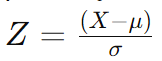

In [31]:
# Média e desvio padrão da coluna 'Wrist'
media_Wrist = dataset_body_fat_pred['Wrist'].mean()
dvp_Wrist = dataset_body_fat_pred['Wrist'].std()
media_Wrist

18.229761904761904

In [32]:
#Desvio padrão
dvp_Wrist

0.9335849289587035

In [33]:
# Cálculo do Z-score para o valor maior que 20
z_score = (20 - media_Wrist) / dvp_Wrist
z_score

1.896172528419641

In [34]:
# Probabilidade de um valor ser maior que 20 usando st.norm.cdf
# A função norm.cdf retorna a probabilidade acumulada à esquerda na distribuição normal padrão
from scipy.stats import norm
probabilidade_20 = (1 - norm.cdf(z_score))
probabilidade_20

0.028968617262717378

In [35]:
#Passando os valores diretamente para a função norm cdf
1- norm.cdf(20, media_Wrist,dvp_Wrist)

0.028968617262717378

- Este resultado nos indica que a probabilidade de encontrarmos no Dataset um pulso maior que 20 é de cerca de 2.9%.
- Outra forma de verificarmos está informação é usar uma tabela de distribuição normal padrão, desta forma, conseguimos identificar a probabilidade de observar um valor maior ou igual a X (probabilidade cumulativa à direita):  

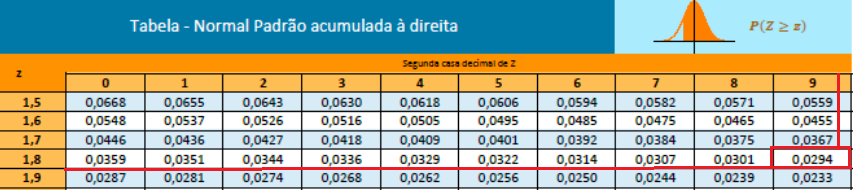

### Questão 4
Escolha uma coluna de valores contínuos A que seja do seu interesse. Depois disso, filtre os registros da sua tabela usando uma segunda coluna B. E, por fim, valendo-se dos seus conhecimentos sobre p-valor, diga se a média de A antes da filtragem é de fato significativamente diferente da média dos valores de A pós filtragem, com um nível de confiança de 95%.

Por exemplo: a coluna BodyFat tem uma determinada média geral. Se filtrarmos o nosso dataset para que ele inclua apenas registros com circunferência abdominal (coluna Abdomen) >= 85, certamente a média da coluna BodyFat mudará. Mas, podemos afirmar, com 95% de confiança estatística, que essa média pós-filtragem é, de fato, diferente da média original?  


**Colunas escolhidas: Peso e abdômen(circunferência)**

In [36]:
dataset_body_fat_pred.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,peso_200
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,0
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0


In [37]:
dataset_body_fat_pred[['Weight', 'Abdomen']].describe()

,Weight,Abdomen
count,252.000000,252.000000
mean,178.924405,92.555952
std,29.389160,10.783077
min,118.500000,69.400000
25%,159.000000,84.575000
50%,176.500000,90.950000
75%,197.000000,99.325000
max,363.150000,148.100000


In [38]:
#Filtrando o dataset por meio da coluna abdômen, queremos apenas resultados em que o abdômen seja maior ou igual a 100
grupo_filtrado = dataset_body_fat_pred[dataset_body_fat_pred['Abdomen'] >= 100]
grupo_filtrado.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,peso_200
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0
13,1.0505,21.2,30,205.25,71.25,39.4,104.1,101.8,108.6,66.0,41.5,23.7,36.9,31.6,18.8,1
19,1.0610,16.5,33,211.75,73.50,40.0,106.2,100.5,109.0,65.8,40.6,24.0,37.1,30.1,18.2,1
33,1.0502,21.3,41,218.50,71.00,39.8,111.7,100.5,108.3,67.1,44.2,25.2,37.5,31.5,18.7,1
34,1.0263,32.3,41,247.25,73.50,42.1,117.0,115.6,116.1,71.2,43.3,26.3,37.3,31.7,19.7,1


In [39]:
grupo_filtrado[['Weight', 'Abdomen']].describe()

,Weight,Abdomen
count,59.000000,59.000000
mean,214.348305,107.108475
std,26.532397,7.956526
min,183.250000,100.000000
25%,200.250000,101.450000
50%,211.750000,105.000000
75%,224.625000,109.800000
max,363.150000,148.100000


Ao comparar as médias de peso entre o grupo com filtro, onde foram considerados apenas os registros com circunferência abdominal maior ou igual a 100 e o dataset original, observamos uma diferença significativa
- Grupo filtrado: mean	214.348305
- Dataset original: mean	178.924405

Essa diferença nas médias sugere que há uma variação considerável no peso dos indivíduos quando consideramos apenas aqueles com circunferência abdominal igual ou superior a 100.

**Para uma avaliação mais robusta, vamos realizar o teste t de Student, para determinar se essa diferença é estatisticamente significativa com um nível de confiança de 95%.**
- Nível de confiança (representado como 1 - α)

Considerações sobre o teste t de Student:
- É usado quando desejamos comparar as médias de duas amostras.
- A hipótese nula (H0) para este teste é que não há diferença significativa entre as médias das duas amostras.
- A hipótese alternativa (HA) é que há uma diferença significativa.
- α= 0,05: Vamos utilizar o nível de significância especificado.

- **O teste t de Student, quando aplicado da maneira tradicional, pressupõe que 5 suposições sejam validadas:**
  - 1: Os dados são aleatórios e representativos da população.
  - 2: A variável do estudo é contínua.
  - 3: Ambos os grupos são independentes (ou seja, grupos exaustivos e excludentes).
  - 4: Os resíduos do modelo são normalmente distribuídos.
  - 5: A variância residual é homogênea (princípio da homocedasticidade)

**Para esta questão, iremos considerar como verdadeiras as suposições de 1 á 3 e validaremos as suposições 4 e 5**

## Verificando a normalidade da coluna Weight

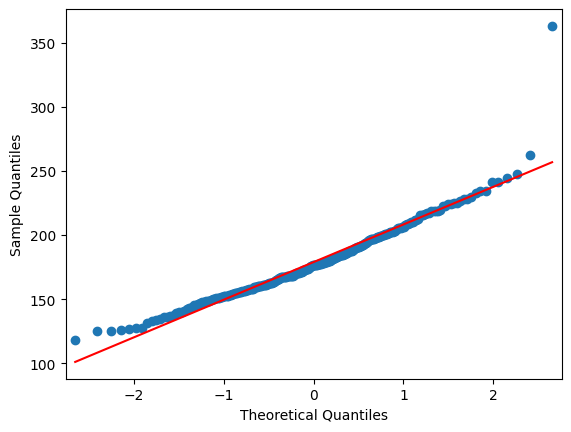

In [40]:
#Verificando a suposição de normalidade da coluna 'Weight' com qqplot:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Criando QQ plot
sm.qqplot(dataset_body_fat_pred['Weight'], line='s')
plt.show()

- Outra suposição do **Teste t** é  que as amostras têm a mesma variância (ou que não há diferença significativa na variância).
Para verificar a suposição da homocedasticidade podemos utilizar alguns testes como Teste F de Fisher(não apresenta função específica no Python), Teste de Levene(mais robusto contra desvios da normalidade) e Teste de Bartlett (mais sensível a desvios da normalidade do que o teste de Levene).


**Vamos aplicar o Teste Bartlett para comparar as variâncias das amostras (extraídas de uma população normalmente distribuída).**

- Hipóteses do Teste de Bartlett:
  - H0 (Hipótese Nula): As variâncias dos dados extraídos de duas ou mais populações são iguais. Isso significa que todas as amostras vêm de populações com a mesma variância.
  - HA (Hipótese Alternativa): Pelo menos duas das variâncias dos dados extraídos de duas ou mais populações não são iguais. Ou seja, existe pelo menos um par de grupos cujas variâncias são significativamente diferentes.

In [41]:
# Realizando o teste de Bartlett para verificar igualdade de variâncias
stat_bartlett, p_valor_bartlett = stats.bartlett(dataset_body_fat_pred['Weight'], grupo_filtrado['Weight'])
print(f'Estatística de teste Bartlett: {stat_bartlett}, p-value: {p_valor_bartlett}')


Estatística de teste Bartlett: 0.938105662137179, p-value: 0.3327654934965895


- Com base nesse resultado, nós falhamos em rejeitar a hipótese nula de igualdade de variâncias. Isso significa que não há diferença estatisticamente significativa entre as variâncias dos dois grupos.Isso significa que podemos assumir homocedasticidade (igualdade de variâncias) para as amostras em questão.

**Desta forma, podemos realizar o teste T de Student tradicional**, caso rejeitassemos a hipótese nula de igualdade de variâncias, poderiamos utilizar uma abordagem que leve em conta essa diferença nas variâncias, como o **teste t de Welch.**




In [42]:
# Realizando o teste t de Student tradicional para comparar as médias
stat, p_valor = stats.ttest_ind(dataset_body_fat_pred['Weight'], grupo_filtrado['Weight'])
print(f'Estatística de teste: {stat}, p-value: {p_valor}')

Estatística de teste: -8.482582136441916, p-value: 9.256705934483932e-16


**O teste t de Student foi realizado para comparar as médias das duas amostras. O valor de p obtido é muito menor que o nível de significância estabelecido a priori de 0.05. Diante desse resultado, rejeitamos a hipótese nula de que não há diferença entre as médias das duas amostras. Portanto, com base no valor de p obtido, podemos concluir que as amostras apresentam uma diferença significativa entre as médias das amostras.**


## Questão 5
**Pesquisas eleitorais envolvem, quase sempre, um imenso problema estatístico: a menos que você esteja interessado nas eleições municipais de uma cidade com 5 mil habitantes, você nunca terá o tempo e o orçamento necessários para entrevistar 100% dos potenciais eleitores. Imagine só, como poderíamos entrevistar mais de 100 milhões de pessoas para tentar prever com exatidão o resultado das eleições presidenciais do Brasil?**

**Utilizando os seus conhecimentos sobre amostragem estatística, descreva como você faria para selecionar, por exemplo, 20 mil pessoas para serem entrevistadas, com o objetivo de produzir uma amostra que seja minimamente suficiente para predizer as intenções de voto de um grupo tão maior de pessoas quanto no caso das eleições presidenciais brasileiras. Explique, também, por que você tomou essa decisão e diga qual é o nome do tipo de amostragem estatística que você utilizou.**  



Resposta:  
Considerando a diversidade presente nas populações, uma abordagem eficaz para selecionar as 20 mil pessoas desejadas seria a utilização da **amostragem estratificada**. Esta técnica oferece várias vantagens, tais como:
- Divisão da população em grupos homogêneos (estratos) com características semelhantes.
- Representação equitativa de cada estrato na amostra, assegurando a inclusão adequada de grupos específicos.
- Evita que um único segmento domine a amostra por acaso;

Para aplicar essa abordagem, podemos dividir a população brasileira em estratos geográficos (Norte, Nordeste, Centro-Oeste, Sudeste, Sul). E estes estratos devem considerar a proporção regional. Por exemplo, se a região Sudeste compreende 40% da população, selecionaríamos 8 mil indivíduos dessa região.
- Em seguida em cada estrato, realizaríamos uma subamostragem estratificada considerando a variável sexo e sua proporção.
- Desta forma, analisaríamos os dados demográficos disponíveis para determinar as proporções de homens e mulheres em cada estrato. Por exemplo, se 52% da população do Sudeste é composta por mulheres, a amostra incluiria cerca de 4.160 mulheres para este estudo na região Sudeste.
- Em seguida para este subestrato dividiríamos o número total de mulheres pelo número de categorias principais que desejamos considerar, por exemplo: escolaridade, faixa etária e renda. Por exemplo, se estamos lidando apenas com três categorias, teríamos cerca 1386 mulheres para cada categoria.
- Para evitar a seleção duplicada, adotaríamos a **amostragem sem reposição**, na qual cada indivíduo é selecionado apenas uma vez. Por exemplo, uma mulher poderia ser representada aleatoriamente em uma das categorias demográficas (classe social, escolaridade, faixa etária), mas não em todas. Isso garantiria que cada pessoa contribuísse apenas uma vez para a amostra final, preservando sua representatividade.
- Então, supondo que estes sejam os nossos dados no subestrato das mulheres da região Sudeste:
  - Classe alta: 5%
  - Classe média-alta: 15%
  - Classe média: 50%
  - Classe baixa: 30%
  - Ensino fundamental completo: 30%
  - Ensino médio completo: 50%
  - Ensino superior completo: 20%
  - Faixa etária 18-30 anos: 40%
  - Faixa etária 31-50 anos: 30%
  - Faixa etária 51 anos ou mais: 30%
- Para categoria faixa-etária, na subcategoria 18-30, teríamos 554 mulheres (40% de 1386) selecionadas.
Faríamos isto para todas as categorias e esse processo seria repetido para os homens. Em seguida usaríamos a mesma abordagem em cada região e para todas as regiões, garantindo uma amostra representativa e diversificada que reflete a heterogeneidade da população brasileira.
